# SHAP Values Workshop

Welcome to the **SHAP Values Workshop**! During this session, we’ll explore how to interpret various machine learning model predictions using SHAP (SHapley Additive exPlanations).

## Workshop Overview

**Length**: 1.5 hours

**Introduction to SHAP Values (40 minutes)**
   - Overview of interpretability and its importance.
   - The theory behind Shapley values.
   - Intepreting SHAP plots.
   - Real world examples

**Break (10 minutes)**
   - We can use this time to ensure everyone's environment is setup correctly and pretrained models are loading, or just to stretch your legs.

**Hands-On SHAP Applications (40 minutes)**
   - Walkthrough with a simple multiple linear regression.
   - Walkthrough with a classifier.
   -  Walkthrough with a neural network (LSTM).

**We’ll use pretrained models (trained on the CAMELS and GAGESII dataset). You’ll load each model, run the SHAP package to generate explanations, and discuss how to interpret them.**


## 1. Data Preprocessing

### 1.1 Dataset Overview
- Let's do some preliminary exploratory data analysis on the CAMELS dataset



In [1]:
# Set project directory
import os
from pathlib import Path
# PROJECT_DIR = Path(__file__).resolve().parent
PROJECT_DIR = os.path.dirname(os.path.abspath(''))
os.chdir(PROJECT_DIR)

# Set directories for accessing data, saving figures, results, and models, and loading model configurations
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'processed')
FIGURE_DIR = os.path.join(PROJECT_DIR, 'outputs','figures')
OUTPUT_DIR = os.path.join(PROJECT_DIR, "outputs")
MODEL_DIR = os.path.join(PROJECT_DIR, "models")
CONFIG_DIR = os.path.join(PROJECT_DIR, "config")

In [2]:
# Read in your data
import pandas as pd
df = pd.read_csv(os.path.join(DATA_DIR, 'CAMELS_cleaned.csv'), index_col=0)
df.index = pd.to_datetime(df.index)

- Print out the first 10 rows of the dataframe

In [3]:
df.head(10)

,STAID,Q,Dayl(s),PRCP(mm/day),SRAD(W/m2),Tmax(C),Vp(Pa),Annual Runoff (mm d-1),Annual Precip (mm d-1),Annual PET (mm d-1),Annual Temp (C),DA (km2),Elevation (m),Slope (m km-1),Frac Forest (%)
DATE,,,,,,,,,,,,,,,
1980-01-01,1013500,655.0,30172.48,0.00,218.66,-13.04,203.28,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-02,1013500,640.0,30253.07,0.00,199.05,-10.93,237.37,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-03,1013500,625.0,30344.16,0.00,197.64,-13.60,169.39,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-04,1013500,620.0,30408.34,0.00,214.61,-16.53,134.57,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-05,1013500,605.0,30413.49,0.00,206.02,-17.60,129.30,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-06,1013500,585.0,30485.90,1.23,203.38,-20.35,103.99,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-07,1013500,570.0,30598.67,3.07,158.00,-14.23,202.78,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-08,1013500,555.0,30733.71,1.17,108.70,-6.36,310.48,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063
1980-01-09,1013500,540.0,30758.40,0.05,136.21,-11.79,196.68,1.66,2.781,1.95,3.931,2303.95,250.31,21.64152,0.9063


- Check to make sure there are no NAs present in our data

In [4]:
print(df.isna().sum())

STAID                     0
Q                         0
Dayl(s)                   0
PRCP(mm/day)              0
SRAD(W/m2)                0
Tmax(C)                   0
Vp(Pa)                    0
Annual Runoff (mm d-1)    0
Annual Precip (mm d-1)    0
Annual PET (mm d-1)       0
Annual Temp (C)           0
DA (km2)                  0
Elevation (m)             0
Slope (m km-1)            0
Frac Forest (%)           0
dtype: int64


- Look at summary statistics of the data

In [5]:
df.describe()

,STAID,Q,Dayl(s),PRCP(mm/day),SRAD(W/m2),Tmax(C),Vp(Pa),Annual Runoff (mm d-1),Annual Precip (mm d-1),Annual PET (mm d-1),Annual Temp (C),DA (km2),Elevation (m),Slope (m km-1),Frac Forest (%)
count,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06,8.093830e+06
mean,6.215030e+06,2.748172e+02,4.320310e+04,3.051040e+00,3.578657e+02,1.118869e+01,1.072845e+03,1.499547e+00,3.066495e+00,2.936082e+00,1.107714e+01,6.535070e+02,7.066414e+02,4.502410e+01,6.455509e-01
std,4.018894e+06,9.024883e+02,7.130490e+03,7.666024e+00,1.305896e+02,1.064319e+01,7.073543e+02,1.551476e+00,1.364157e+00,6.203870e-01,5.262905e+00,8.646894e+02,7.109001e+02,4.636219e+01,3.721967e-01
min,1.013500e+06,0.000000e+00,2.901244e+04,0.000000e+00,3.591000e+01,-3.707000e+01,1.810000e+01,8.000000e-03,4.730000e-01,1.891000e+00,-5.729000e+00,6.100000e+00,1.021000e+01,8.222100e-01,0.000000e+00
25%,2.327100e+06,8.200000e+00,3.663360e+04,0.000000e+00,2.593700e+02,3.500000e+00,5.063200e+02,6.570000e-01,2.268000e+00,2.433000e+00,7.179000e+00,1.345600e+02,2.415300e+02,7.250430e+00,2.772000e-01
50%,5.593575e+06,4.700000e+01,4.320000e+04,1.000000e-01,3.646300e+02,1.166000e+01,8.644200e+02,1.105000e+00,2.994000e+00,2.824000e+00,1.059300e+01,3.434600e+02,4.485300e+02,2.707084e+01,8.219000e-01
75%,9.447800e+06,1.930000e+02,4.976640e+04,2.250000e+00,4.649500e+02,1.956000e+01,1.527460e+03,1.722000e+00,3.487000e+00,3.308000e+00,1.438100e+01,7.938500e+02,8.756700e+02,7.081645e+01,9.741000e-01
max,1.440000e+07,9.120000e+04,5.738756e+04,3.089700e+02,6.963200e+02,3.851000e+01,3.599380e+03,9.734000e+00,1.090400e+01,5.261000e+00,2.386400e+01,5.915630e+03,3.116820e+03,2.556884e+02,1.000000e+00


- Look at distributions of data

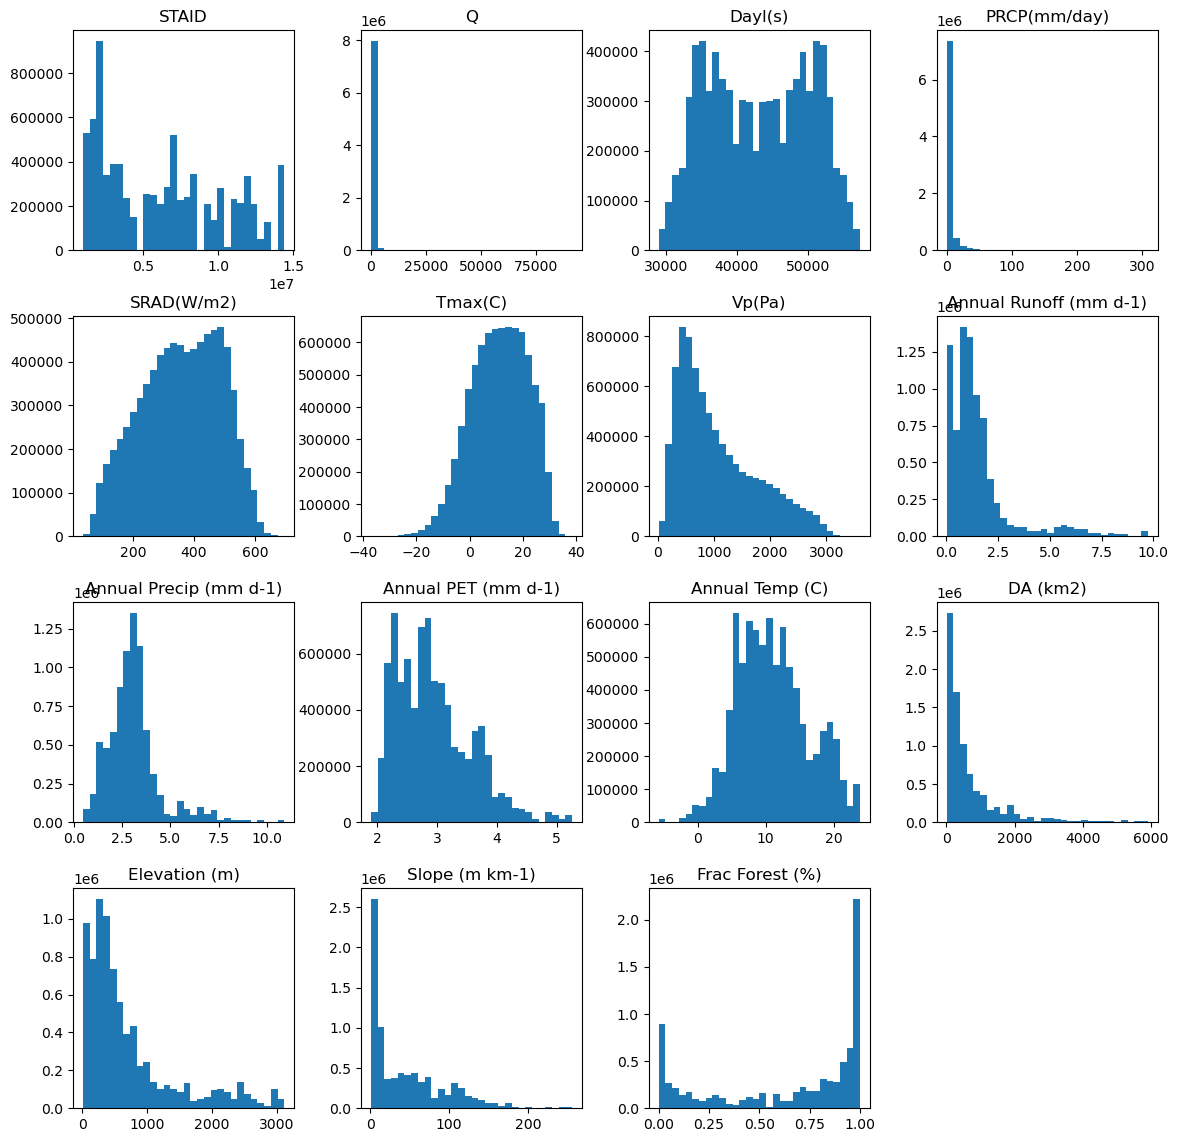

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(14, 14), grid=False)
plt.show()

### 1.2.1 Preprocess data for the Multiple Linear Regression Model
- Split dataframe in X (inputs) and y (target), scale input data, and split into training and testing sets

In [7]:
# First, copy the dataframe for the LSTM so that the original dataframe is preserved
df_lstm = df.copy()

# Drop STAID from the dataframe
try:
    df.drop(columns=['STAID'], inplace=True)
except:
    print("STAID already dropped from dataframe")
    
from sklearn.preprocessing import StandardScaler
X = df.drop('Q', axis=1)
y = df['Q']

feat_scaler = StandardScaler()
X_sc = pd.DataFrame(
    feat_scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

y_scaler = StandardScaler()
y_sc = pd.Series(y_scaler.fit_transform(y.values.reshape(-1,1)).squeeze(),
    index=y.index, name='Q')

# get mean and scaler value for y_scaler, which we'll use to retranform the SHAP values later
y_scaler_mean = y_scaler.mean_[0]
y_scaler_scale = y_scaler.scale_[0]

# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

### 1.2.2 Process data for the LSTM model

- Reshape data for LSTM (n_batches, window_length, n_features)

In [8]:
from src.model_building import build_lstm_windows
window_length = 60 # days
X_rs, y_rs = build_lstm_windows(X_test, y_test, window_length)
print(X_rs.shape)

(1618707, 60, 13)


## 2. Applying SHAP to a Multiple Linear Regression

### 2.1 Loading the Pretrained Multiple Linear Regression
Use `sklearn.linear_model.LinearRegression` to fit a multiple linear regression model to predict discharge


In [9]:
# Load in pre-trained multiple linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### 2.2 Running SHAP Explanations
We'll use SHAP's `Explainer` for the **Multiple Linear Regression model**. Then we generate `shap_values` for the dataset.


In [10]:
import shap
# Get 10,000 random samples from the dataset
idx = np.random.choice(len(X_sc), size=10000, replace=False)
X_shap = X_sc.iloc[idx]        
y_shap = y_sc.iloc[idx]
feature_names = list(X.columns)

# Generate shap Explainer object and shap values
linear_explainer = shap.Explainer(linreg, X_shap)
shap_values = linear_explainer(X_shap)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [11]:
print(shap_values)

.values =
array([[-0.05007978,  0.26464118,  0.06356727, ...,  0.00205639,
        -0.00520559,  0.01907043],
       [ 0.04023928, -0.02612609, -0.07652013, ..., -0.00137603,
         0.01492369, -0.03011868],
       [-0.06909432, -0.02603469,  0.06020942, ...,  0.00081806,
        -0.00054697,  0.02518949],
       ...,
       [-0.02868842, -0.00455392,  0.05956477, ...,  0.00070284,
        -0.00217671,  0.02763035],
       [-0.09101991, -0.02265261,  0.05951872, ..., -0.00283003,
         0.00839189,  0.01049699],
       [ 0.09490608,  0.05284999,  0.01631301, ...,  0.00035554,
         0.00968819,  0.02823888]])

.base_values =
array([-0.00957209, -0.00957209, -0.00957209, ..., -0.00957209,
       -0.00957209, -0.00957209])

.data =
array([[-1.11519675,  3.75148359, -1.48653285, ..., -0.78299541,
        -0.82598047,  0.58799331],
       [ 0.72658429, -0.3979951 ,  1.54203968, ...,  0.60946484,
         2.36013531, -1.36661862],
       [-1.50294013, -0.39669064, -1.413939  , ..., -0

The SHAP values are in units of the scaled output, so we need to untransform the SHAP values so we can interpret them in unscaled units of discharge.

In [12]:
# Multiply by the scaler values
shap_values.values *= y_scaler_scale
shap_values.base_values *= y_scaler_scale

# Add the mean to the base values (model mean) to rescale
shap_values.base_values += y_scaler_mean

# Rescale the input data
shap_values.data = feat_scaler.inverse_transform(shap_values.data)
X_shap_untransformed = feat_scaler.inverse_transform(X_shap)

In [13]:
print(shap_values)

.values =
array([[-45.19641288, 238.83556107,  57.36871441, ...,   1.8558667 ,
         -4.69797964,  17.21084289],
       [ 36.31547743, -23.57849255, -69.0585184 , ...,  -1.24184978,
         13.46845915, -27.18175628],
       [-62.35681085, -23.49599835,  54.3382968 , ...,   0.7382917 ,
         -0.49363826,  22.73322121],
       ...,
       [-25.89096518,  -4.1098611 ,  53.75650776, ...,   0.63430431,
         -1.96445957,  24.93607046],
       [-82.14439821, -20.44371291,  53.7149514 , ...,  -2.55406865,
          7.57358524,   9.47341117],
       [ 85.65162157,  47.69649718,  14.72229942, ...,   0.32087136,
          8.74347996,  25.48525725]])

.base_values =
array([266.17851429, 266.17851429, 266.17851429, ..., 266.17851429,
       266.17851429, 266.17851429])

.data =
array([[3.5251200e+04, 3.1810000e+01, 1.6374000e+02, ..., 1.5001000e+02,
        6.7298400e+00, 8.6440000e-01],
       [4.8384000e+04, 0.0000000e+00, 5.5924000e+02, ..., 1.1399100e+03,
        1.5444513e+02, 1.36

**Now the SHAP values are in units of unscaled discharge**

### 2.3 Visualizing SHAP values
- The SHAP package has built in visualizations to help interpret SHAP values. We can examine SHAP values globally or for local predictions.
- In this workshop, we'll explore 5 visualization techniques:

    1. **Bar Plot** (Feature importances)
    
    2. **Beeswarm plot** (feature importances and attribution)

    3. **Dependence plot** (How a single feature affects predictions)

    4. **Force Plot** (balance of forces for a given prediction)

    5. **Waterfall Plot** (a waterfall plot is similar to a force plot, but it steps through each feature contribution sequentially)


#### 2.3.1 Bar Plots
- Bar plots show which features are most important for predictions by showing their mean absolute SHAP value

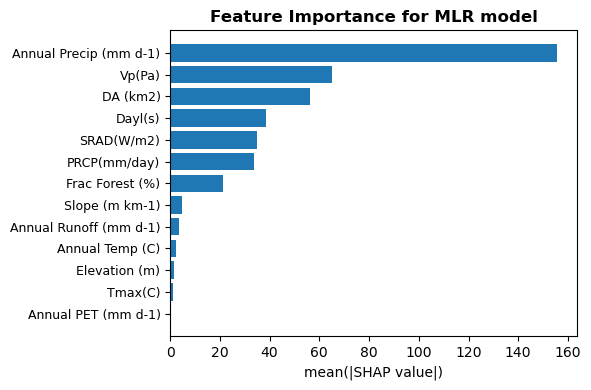

In [14]:
from src.visualization import plot_shap_bar_unscaled

plot_shap_bar_unscaled(
        shap_values,
        feature_names=X.columns,
        title="Feature Importance for MLR model"
)
plt.show()

- We can check to make sure this generally aligns with the coefficients of our MLR model

In [15]:
for i, col in enumerate(list(X_sc.columns)):
    print(f"Coefficient for {col} = {round(linreg.coef_[i], 4)}")

Coefficient for Dayl(s) = 0.049
Coefficient for PRCP(mm/day) = 0.0701
Coefficient for SRAD(W/m2) = -0.0463
Coefficient for Tmax(C) = -0.0017
Coefficient for Vp(Pa) = -0.0889
Coefficient for Annual Runoff (mm d-1) = -0.0064
Coefficient for Annual Precip (mm d-1) = 0.2552
Coefficient for Annual PET (mm d-1) = 0.0001
Coefficient for Annual Temp (C) = 0.003
Coefficient for DA (km2) = 0.0955
Coefficient for Elevation (m) = -0.0025
Coefficient for Slope (m km-1) = 0.0063
Coefficient for Frac Forest (%) = 0.0252


#### 2.3.2 Beeswarm plots
- Beeswarm plots show not only feature importance, but feature directionality as well

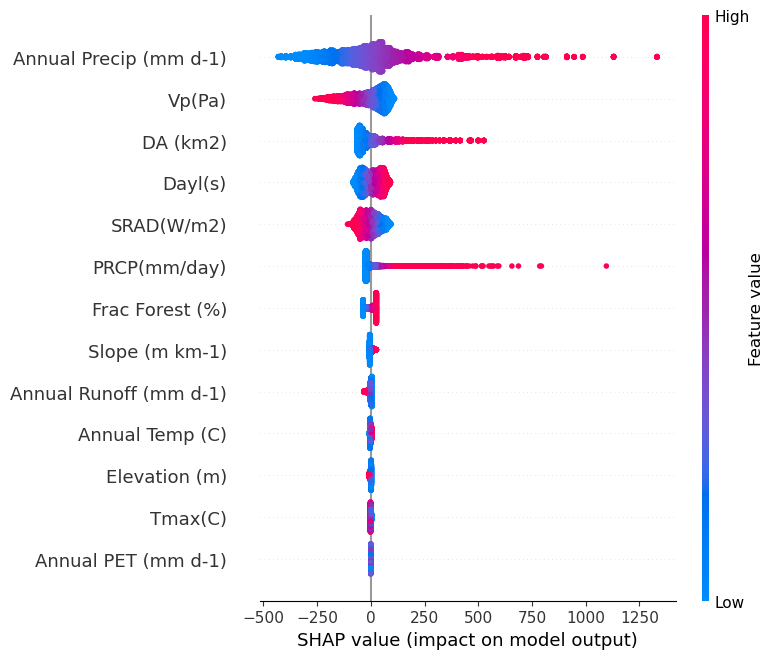

In [16]:
# A feature attribution (beeswarm) plot
shap.summary_plot(shap_values, X_shap_untransformed, feature_names=feature_names)

#### 2.3.3 Dependence plots
- Dependence plots show how the SHAP values for a given feature change based on the magnitude of that input feature

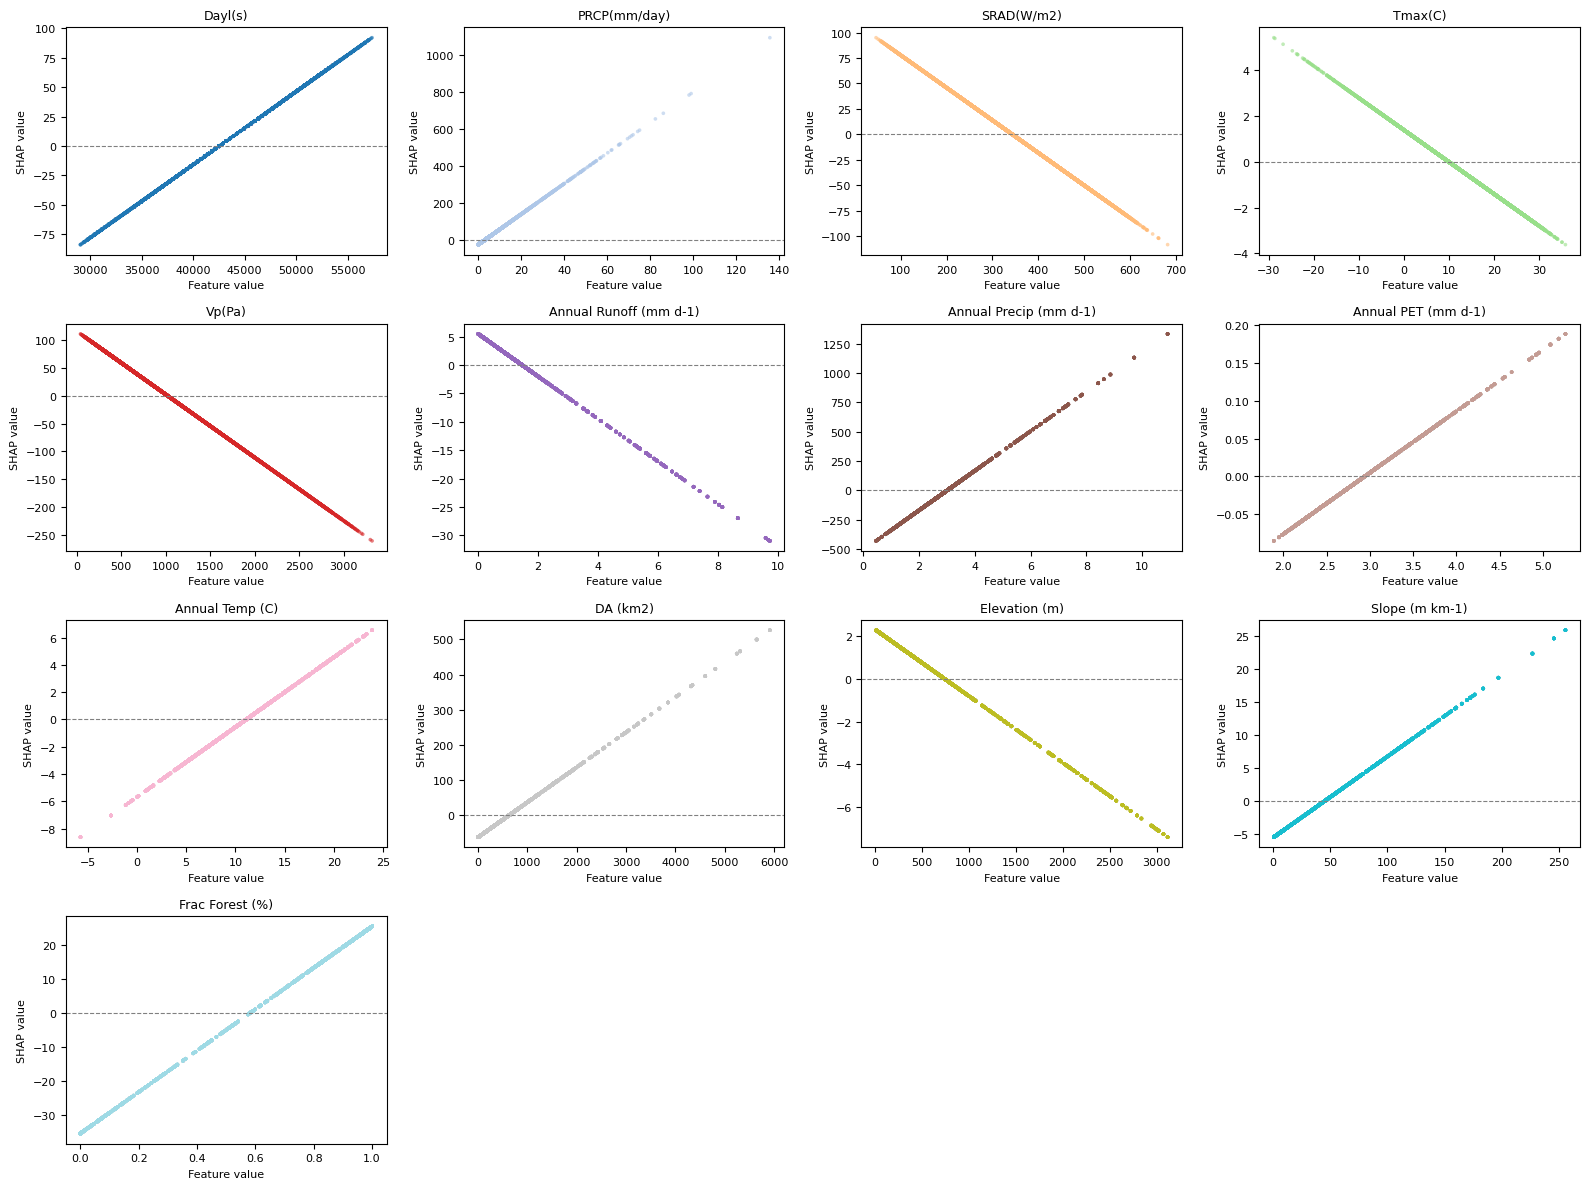

<Figure size 640x480 with 0 Axes>

In [17]:
from src.visualization import plot_all_dependence

fig, axes = plot_all_dependence(
                shap_values       = shap_values,       
                X_values          = X_shap_untransformed,
                feature_names     = feature_names,
                n_cols            = 4,
                point_size        = 7,
                alpha             = 0.6,
                cmap_name         = "tab20")
plt.show()

plt.tight_layout()
plt.show()

#### 2.3.4 Force Plots
- Force plots show you how each input feature affects a single prediction

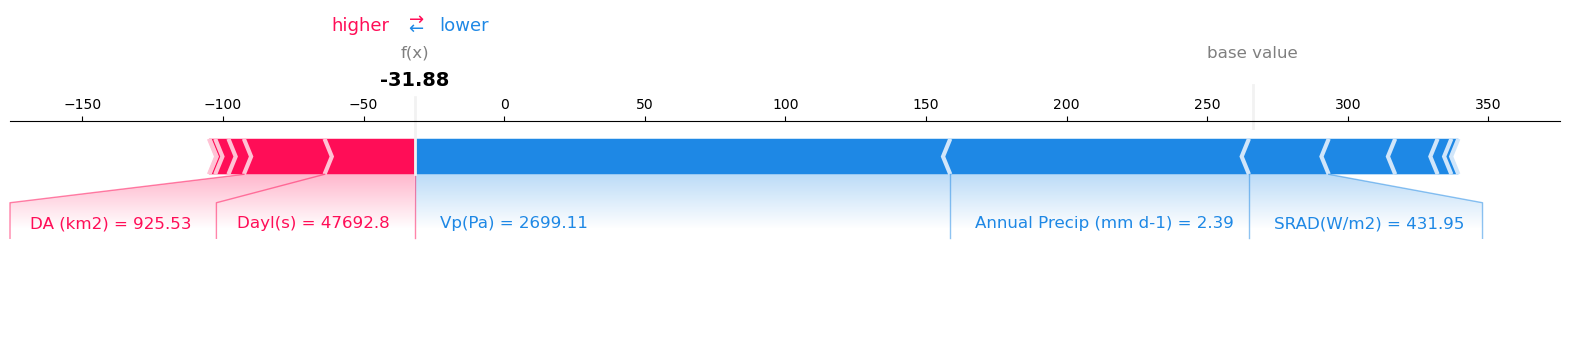

<Figure size 640x480 with 0 Axes>

In [18]:
# Get a random index to show a force plot interpretation
row = np.random.randint(0, len(X_shap))

# Round featuers for display
feat_raw = X_shap_untransformed[row, :]
feat_round = feat_raw.round(2)

# Plot force plot
shap.initjs()               
shap.force_plot(
        base_value = shap_values.base_values[row],
        shap_values = shap_values.values[row],
        features    = feat_round,
        feature_names = feature_names,
        matplotlib = True              
)
plt.tight_layout()
plt.show()

#### 2.3.5 Waterfall plots
- Waterfall plots are similar to force plots, but add feature contributions one by one, starting from the E[f(x)] at the bottom of the plot, and stepping through the contribution of each feature in order of ascending importance.

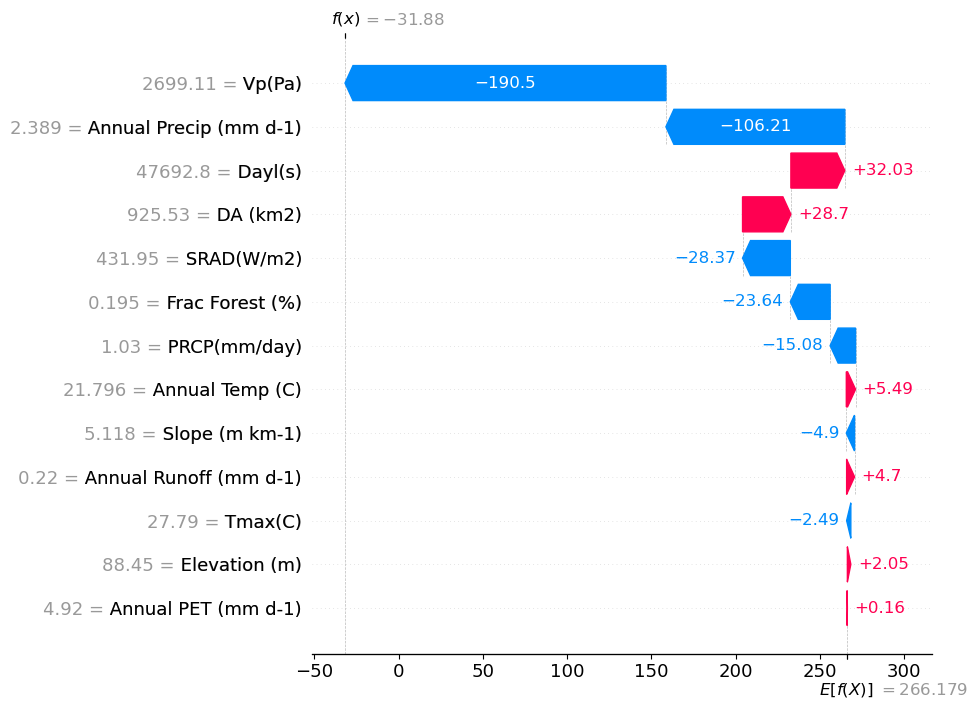

In [19]:
shap.plots.waterfall(shap_values[row], max_display=15)

## 3. Neural Network (LSTM) with SHAP

- Now we'll demonstrate generating and interpreting SHAP values with a Neural Network (LSTM) model

### 3.1 Build LSTM model and load pretrained weights

In [22]:
import numpy as np, h5py, tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras import layers
from src.model_building import build_lstm

tf.compat.v1.disable_eager_execution()

weights_path = MODEL_DIR + "/LSTM_weights_v3.weights.h5"

with h5py.File(weights_path, "r") as f, tf.compat.v1.Session() as sess:
    K.set_session(sess)

    model = build_lstm(window_length, X_train.shape[1], hidden_units=8)

    # -------- locate layers by type -----------
    lstm_layer   = next(l for l in model.layers if isinstance(l, layers.LSTM))
    dense_hid    = next(l for l in model.layers
                        if isinstance(l, layers.Dense) and l.units == 8)
    dense_out    = next(l for l in model.layers
                        if isinstance(l, layers.Dense) and l.units == 1)

    mw = f["model_weights"]

    # ----- LSTM weights (kernel, recurrent_kernel, bias) -----
    g_lstm = mw["lstm"]["lstm"]["lstm_cell"]
    lstm_w = [np.asarray(g_lstm[n][()], dtype=np.float32)
              for n in ("kernel", "recurrent_kernel", "bias")]
    lstm_layer.set_weights(lstm_w)

    # ----- Hidden dense weights (kernel, bias) -----
    g_dense = mw["dense"]["dense"]
    dense_w = [np.asarray(g_dense[n][()], dtype=np.float32)
               for n in ("kernel", "bias")]
    dense_hid.set_weights(dense_w)

    # ----- Output dense weights (kernel, bias) -----
    g_out = mw["dense_1"]["dense_1"]
    out_w = [np.asarray(g_out[n][()], dtype=np.float32)
             for n in ("kernel", "bias")]
    dense_out.set_weights(out_w)

    # SHAP (graph mode) 
    # Get 1000 random batches
    rng   = np.random.default_rng(42)          
    idx   = rng.choice(len(X_rs), 1000, replace=False)
    X_shap_lstm = X_rs[idx]
    explainer = shap.DeepExplainer(model, X_shap_lstm, session=sess)
    shap_vals = explainer.shap_values(X_shap_lstm)

2025-05-16 16:59:56.528194: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-05-16 16:59:56.528252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


Model: "lstm_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60, 13)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 704       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
shap_explainer = shap.Explanation(values=shap_vals, base_values=explainer.expected_value, data=X_shap_lstm)

# Flatten shap values along the second dimension to turn (n_batches, window_length, n_features) array into (n_batches * window_length, n_features) array
shap_values_2d = shap_explainer[0].values.reshape(-1, shap_explainer[0].values.shape[-1]) 
shap_base_values_2d = shap_explainer
data_2d = shap_explainer.data.reshape(-1, shap_explainer.data.shape[-1])
print(shap_values_2d.shape, data_2d.shape)

(60000, 13) (60000, 13)


- Rescale the shap values

In [44]:
# Multiply by the scaler values
shap_values_2d *= y_scaler_scale
shap_explainer.base_values *= y_scaler_scale

# Add the mean to the base values (model mean) to rescale
shap_values.base_values += y_scaler_mean

# Rescale the input data
data_2d = feat_scaler.inverse_transform(data_2d)
# X_shap_untransformed = feat_scaler.inverse_transform(X_shap)

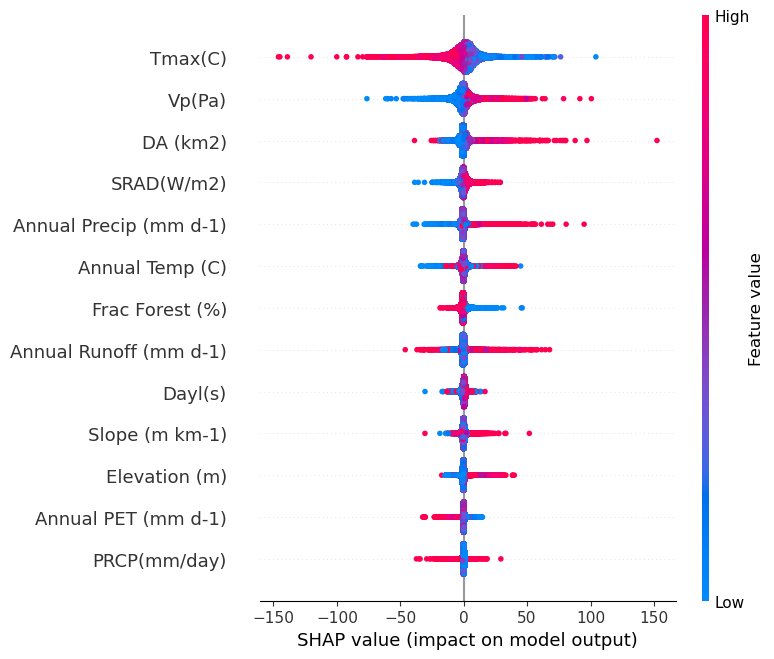

In [46]:
shap.summary_plot(shap_values_2d, data_2d, feature_names=feature_names)

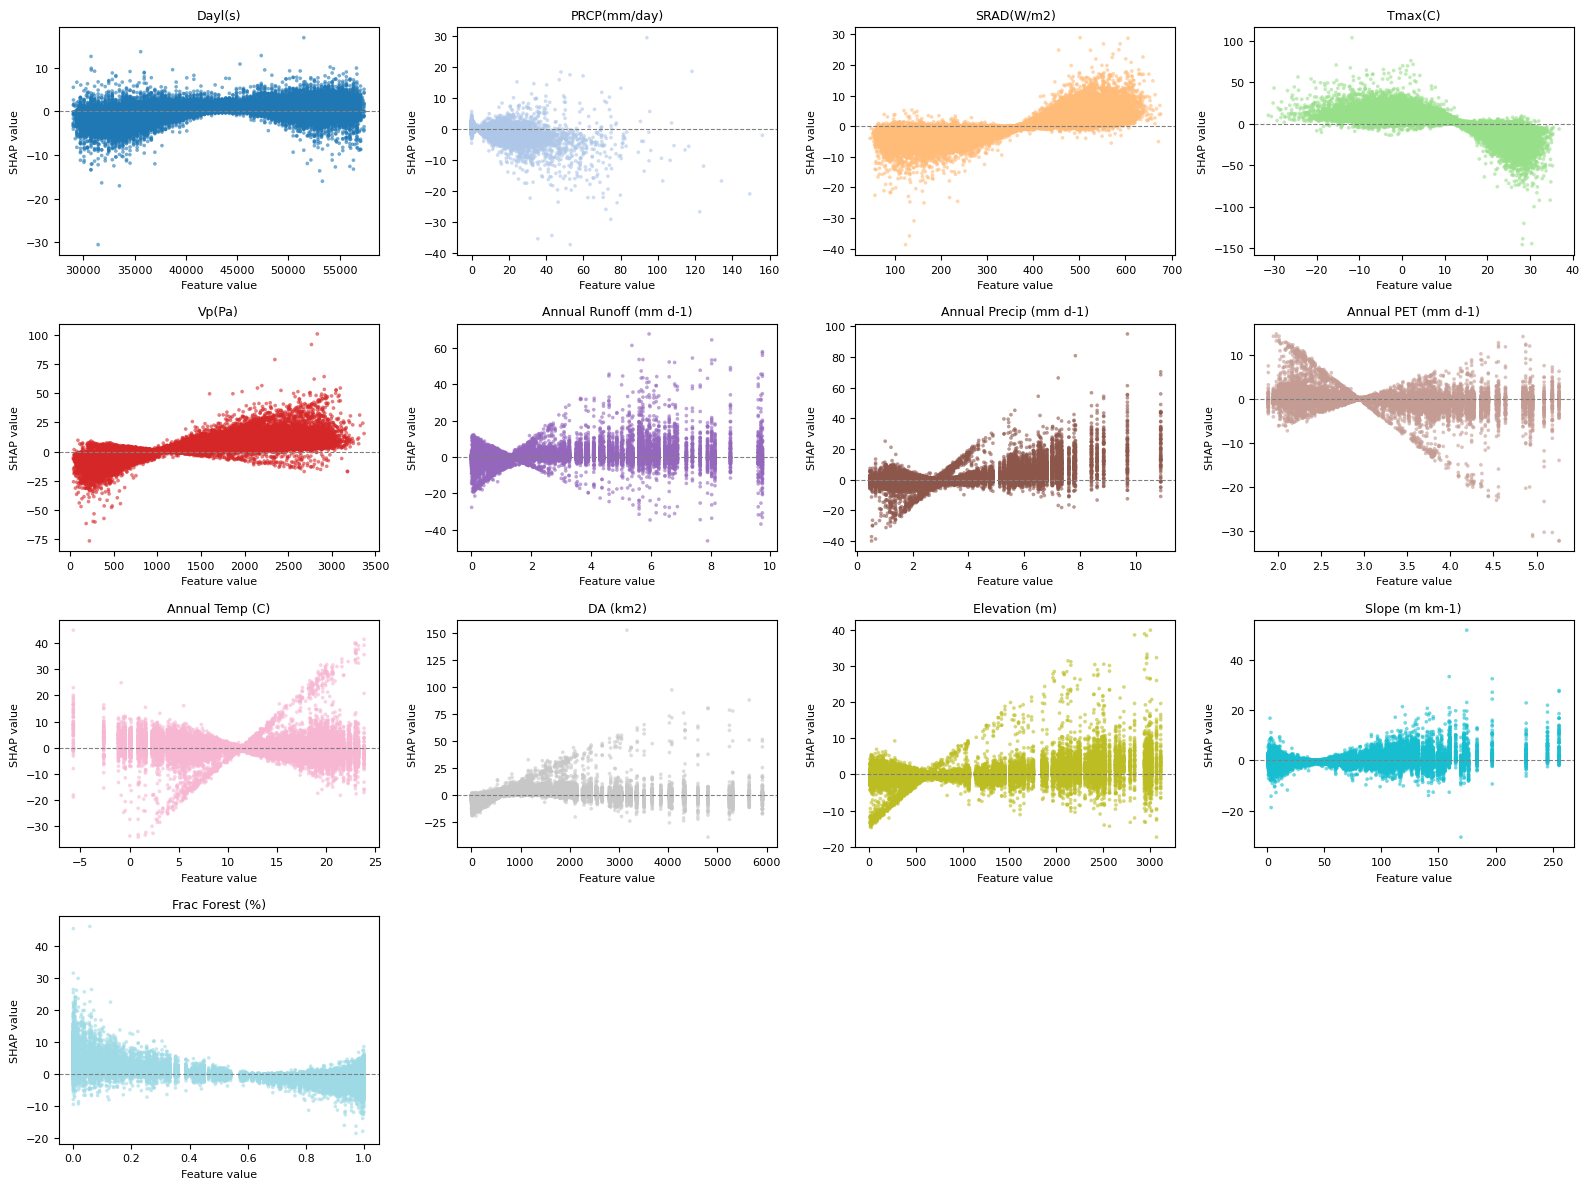

<Figure size 640x480 with 0 Axes>

In [47]:
fig, axes = plot_all_dependence(
                shap_values       = shap_values_2d,       
                X_values          = data_2d,
                feature_names     = feature_names,
                n_cols            = 4,
                point_size        = 7,
                alpha             = 0.6,
                cmap_name         = "tab20")
plt.show()

plt.tight_layout()
plt.show()

## 4. Applying SHAP to a Classifier
Objective:  Use SHAP values to explore features associated with unique baseflow regimes.

### 4.1 Dataset Overview
- Approximately 800 reference-quality gages across CONUS from GAGES-II dataset.
- Watershed characteristics (climatic, geographic, hydrologic, geologic, land use, etc....) for each gage.
- Gages clustered into seven clusters based on long-term baseflow behavior.

### 4.2 Methodology
- Random Forest Classification model used to predict a gage's cluster based on watershed characteristics.
- SHAP explanation object generated on the classification model.

See:    *van der Heijden, R., Dadkhah, A., Hamshaw, S., Ghazanfari, E., Dewoolkar, M., Jones, N., Williams, G., Prabhakar, C., Rizzo, D.M.
        "Identifying and interpreting physical processes and NWM prediction bias associated with baseflow regimes across the CONUS".
        Water Resources Research (under review)*


Questions / comments: rvanderh@uvm.edu


In [21]:
#%% Import Libraries
import numpy as np
import pandas as pd
import shap
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# set up plot preferences
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 12

In [ ]:
data = pd.read_csv(os.path.join(MODEL_DIR, 'RF_classifier_DevCon.csv'))
data.drop(columns=['STAID'], inplace=True)

In [ ]:
# Model Setup
y = data['Cluster_H_7']
X = data.drop(columns=['Cluster_H_7'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The model parameters have already been tuned
tuned_params = {
    'n_estimators': 800,
    'max_features': 'sqrt',
    'max_depth': 70,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True
    }

In [ ]:
# Fit model to training data
rf = RandomForestClassifier(n_estimators = tuned_params['n_estimators'],
                            max_depth = tuned_params['max_depth'],
                            max_features = tuned_params['max_features'],
                            min_samples_leaf = tuned_params['min_samples_leaf'],
                            min_samples_split = tuned_params['min_samples_split'],
                            bootstrap = tuned_params['bootstrap'],
                            random_state = 742
                            )

rf.fit(X_train, y_train)

# Add cluster number to X_test
X_test = pd.merge(left=X_test, right=data['Cluster_H_7'], left_index=True, right_index=True)

In [ ]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

### 4.3 About the Explanation Object
- The explanation object was created only using the test subset of the data
- For this exercise, the explanation object only included the 10 most important features.
- The size of the explanation object depends on these factors:


[# data points : # features : # output classes]

[156 data points in the test set : 10 features : 7 output classes]

In [ ]:
# Generate explanation object and compute SHAP values
explainer = shap.Explainer(rf, X_test)
sv = explainer(X_test, check_additivity=False)

# check the shape of the explanation object
sv.shape

### 3.4 About the Beeswarm Plot

The beeswarm plot is a collection of features associated with the output class. For a classification model, each output class has it's own beeswarm plot.

The features are arranged on the y-axis and ordered by feature importance, with the most importand features appearing at the top.

For each feature, all data points are shown (i.e., in this case 156 data points), arranged along the x-axis by their **SHAP value**, with vertical spread indicating density akin to a violin plot.

The data points are color-coded based on their **feature value**. Note that the color ramp is scaled to the range of values of each feature individually, thus is shows a relative magnitude ("high" or "low" feature values).

To interrogate the model further, we can look at the actual distribution of feature values (more on this later...).

In [ ]:
# Let's look at Cluster 2, which is predominantly in the intermountain-west physiographic region
clust = 2

# Construct a beeswarm plot by modifying the built-in shap.plots.beeswarm
#### Figure
fig, ax = plt.subplots(dpi=300, layout='constrained')

#### Plots
shap.plots.beeswarm(sv[:,:,(clust-1)],              # slice the SHAP values [all data points : all features : selected output class]
                    axis_color='k',
                    color=plt.get_cmap('cool'),
                    alpha=0.7,
                    order=shap.Explanation.abs.mean(0),     # SHAP provides a few methods for ordering features (see documentation)
                    color_bar=False,
                    show=False,
                    plot_size=(6, 5))

#### Axes
# For clarity, just showing the top 4 features
ax.set_ylim(5.5, 9.5)
ax.set_xlabel('SHAP Value', fontsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)

# Set visibility of plot frame lines
for spine in ax.spines:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(0.7)

ax.grid(visible=True, which='Major', axis='y',
        color='w', linestyle='-', linewidth=1)

# Colorbar
cax = ax.inset_axes([0.7, 0.15, 0.25, 0.03])
img = ax.scatter(x=[0,0], y=[0,0], c=[0,1], cmap='cool')
cbar=fig.colorbar(img, ticks=[0, 1],
                    fraction = 0.05,
                    pad = 0.05,
                    cax=cax,
                    label='Feature Value',
                    orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'High'])

plt.show()

### 3.4 KDE Plots

In [ ]:
# These characteristics are for Cluster 2, and you will need to change them manually depending on the cluster you want to plot
c = '#4776ee'
var = ['SNOW_PCT_PRECIP', 'WB5100_JUN_MM', 'WB5100_NOV_MM', 'WB5100_NOV_MM']
feat = ['Snow as % Total Precipitation [%]', 'Watershed Runoff - June [mm]', 'Annual Watershed Runoff\nIntegrated Estimate [mm]', 'Watershed Runoff - November [mm]']

anno_coords = [
(0.7, 0.7),
(0.7, 0.7),
(0.7, 0.7),
(0.7, 0.7)
]
dist_coords = [
(0.7, 0.4),
(0.7, 0.4),
(0.7, 0.4),
(0.7, 0.4)
]

# Figure showing distributions
fig, ax = plt.subplots(figsize=(3, 6.5), nrows=4, ncols=1, sharex=False, sharey=False, dpi=300, layout='constrained')

for i in range(0, len(var)):
    kde = data[var[i]]
    plot = kde.plot.kde(ax=ax[i], style=['k'], linewidth=0.5)
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y
    
    ax[i].fill_between(x,y,color='gainsboro', alpha=0.7)

    # plot cluster points
    x_clust = X_test[var[i]][X_test['Cluster_H_7'] == clust]
    ax2 = ax[i].twinx()
    var_dist = x_clust.plot.kde(ax=ax2, style=['k'], linewidth=0.5)
    x_var = var_dist.get_children()[0]._x
    y_var = var_dist.get_children()[0]._y
    ax2.fill_between(x_var,y_var,color=c, alpha=0.7, label='_nolegend_')

    ax2.set_ylabel('')
    ax2.set_yticklabels('')
    ax2.set_yticks([])
    ax2.set_ylim(0)

    # Annotation for gray distribution
    ax[i].annotate('min={}\nmax={}'.format(min(kde), max(kde)), dist_coords[i], xycoords='axes fraction', fontsize=8, color='gray')
    # Annotation for color distribution
    ax[i].annotate('min={}\nmax={}'.format(min(x_clust), max(x_clust)), anno_coords[i], xycoords='axes fraction', fontsize=8, color=c)

for i in range(0, len(var)):
    ax[i].set_ylabel('')
    ax[i].set_yticklabels('')
    ax[i].set_yticks([])
    ax[i].set_ylim(0)
    ax[i].set_xlim(0)
    ax[i].set_xlabel(feat[i], fontsize=8)

fig.supylabel('Density', fontsize=10)

## 5. Wrap-Up and Next Steps
- **Summary of Key Takeaways**:

## 6. Additional Resources
- **Resources**:
  - [SHAP GitHub repo](https://github.com/slundberg/shap)
  - [Official SHAP documentation and example notebooks](https://shap.readthedocs.io/en/latest/)
  - [Original SHAP paper (Lundberg & Lee, 2017)](https://arxiv.org/pdf/1705.07874)

Thank you for attending the **SHAP Values Workshop**!